## Data Exploration

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Uploading Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Find the path to the dataset
import os
os.getcwd()

'/Users/tajania/code/AlcaRmsp/the_laundromat'

In [4]:
# create a csv path
csv_path = '/Users/tajania/code/AlcaRmsp/the_laundromat'
csv_path

'/Users/tajania/code/AlcaRmsp/the_laundromat'

In [5]:
# Uploading dataset into a dataframe 
df=pd.read_csv(os.path.join(csv_path, 'raw_data/data.csv'))
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
# change names of the columns to be uniform
df = df.rename(columns={'oldbalanceOrg':'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', \
                        'oldbalanceDest':'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})
df.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
# Get a description of the dataset
df.describe()

,step,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
# Correlation matrice
df.corr()

,step,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldBalanceOrig,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newBalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldBalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newBalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [9]:
# Get the shape of dataset
df.shape

(6362620, 11)

In [10]:
# Get the type of dataset
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldBalanceOrig    float64
newBalanceOrig    float64
nameDest           object
oldBalanceDest    float64
newBalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [11]:
# check nil values in the dataset
df.isnull().values.any()

False

### Fraudulent transactions exploration

The dataset contains two columns called "isFraud" and "isFlaggedFraud". The column "isFlaggedFraud" traces fraudulent transactions following rule based  algorithm but are yet to be reviewed and invetigated by an investogator. The column "isFraud" has been reviewd by the invistigator

In [12]:
# Count the number and percentage of faudulent transaction in the dataset
number_fraud=(df.isFraud==1).value_counts()
percentage_fraud=number_fraud/len(df)
print(number_fraud)
print(percentage_fraud)

False    6354407
True        8213
Name: isFraud, dtype: int64
False    0.998709
True     0.001291
Name: isFraud, dtype: float64


Conclusion: 8213 transactions out of 6362620 are fraudulent 

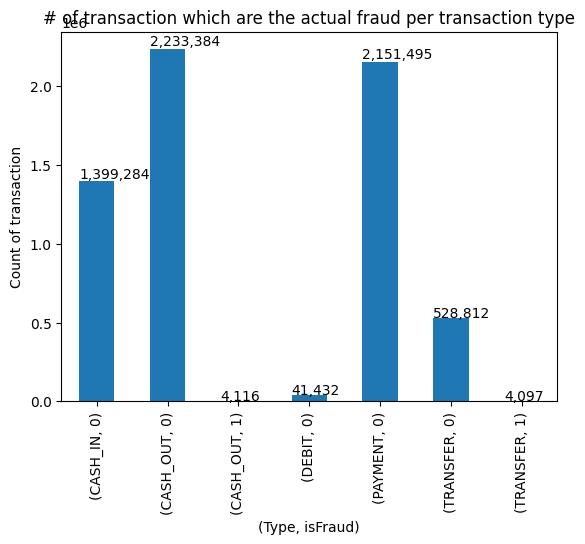

In [14]:
# Overview of transactions which are actual fraud per type of transaction
ax = df.groupby(['type', 'isFraud']).size().plot(kind='bar')
ax.set_title("# of transaction which are the actual fraud per transaction type")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

In [15]:
# Count the number of rows/data per type of operation
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [16]:
# Count number of fraudulent transaction when type is PAYMENT
df[df['type']=='PAYMENT'][df.isFraud==1].count()

/var/folders/pn/kmxsmqhd55x03nlqp2svkrxc0000gn/T/ipykernel_61219/1777184851.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['type']=='PAYMENT'][df.isFraud==1].count()


step              0
type              0
amount            0
nameOrig          0
oldBalanceOrig    0
newBalanceOrig    0
nameDest          0
oldBalanceDest    0
newBalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [17]:
# Count number of fraudulent transaction when type is TRANSFER
df[df['type']=='TRANSFER'][df.isFraud==1].count()

/var/folders/pn/kmxsmqhd55x03nlqp2svkrxc0000gn/T/ipykernel_61219/3345644087.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['type']=='TRANSFER'][df.isFraud==1].count()


step              4097
type              4097
amount            4097
nameOrig          4097
oldBalanceOrig    4097
newBalanceOrig    4097
nameDest          4097
oldBalanceDest    4097
newBalanceDest    4097
isFraud           4097
isFlaggedFraud    4097
dtype: int64

In [18]:
# Count number of fraudulent transaction when type is CASH_IN
df[df['type']=='CASH_IN'][df.isFraud==1].count()

/var/folders/pn/kmxsmqhd55x03nlqp2svkrxc0000gn/T/ipykernel_61219/2730498948.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['type']=='CASH_IN'][df.isFraud==1].count()


step              0
type              0
amount            0
nameOrig          0
oldBalanceOrig    0
newBalanceOrig    0
nameDest          0
oldBalanceDest    0
newBalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [19]:
# Count number of fraudulent transaction when type is CASH_OUT
df[df['type']=='CASH_OUT'][df.isFraud==1].count()

/var/folders/pn/kmxsmqhd55x03nlqp2svkrxc0000gn/T/ipykernel_61219/3994132455.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['type']=='CASH_OUT'][df.isFraud==1].count()


step              4116
type              4116
amount            4116
nameOrig          4116
oldBalanceOrig    4116
newBalanceOrig    4116
nameDest          4116
oldBalanceDest    4116
newBalanceDest    4116
isFraud           4116
isFlaggedFraud    4116
dtype: int64

In [20]:
# Count number of fraudulent transaction when type is DEBIT
df[df['type']=='DEBIT'][df.isFraud==1].count()

/var/folders/pn/kmxsmqhd55x03nlqp2svkrxc0000gn/T/ipykernel_61219/3257200122.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['type']=='DEBIT'][df.isFraud==1].count()


step              0
type              0
amount            0
nameOrig          0
oldBalanceOrig    0
newBalanceOrig    0
nameDest          0
oldBalanceDest    0
newBalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Conclusion: Fraudulent transactions happens during TRANSFER and CASH_OUT operations


### Flagged as fraud vs actual fraud

Check if the "isFlaggedFraud" is related to other columns or variables and try to explain the relationship if there is one.


See if all transactions that are flagged as fraud are actual fraud

In [43]:
# Now that we have the type of operations when fraud happens, the next step will be to check how 
# many operations have been flagged as fraudulent
dfFlagged = df[df['type']=='TRANSFER'][df.isFlaggedFraud==1]
dfFlagged

/var/folders/pn/kmxsmqhd55x03nlqp2svkrxc0000gn/T/ipykernel_61219/411006161.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfFlagged = df[df['type']=='TRANSFER'][df.isFlaggedFraud==1]


,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [44]:
# Get the lenght of fraudulent transaction flagged
len(dfFlagged)

16

Only 16 operations out of 4097 fraudulant transactions have been flagged as fraud during the TRANSFER process


In [39]:
#check the rule based algorithm efficacy
df_NonFlagged = df[df['type']=='TRANSFER'][df.isFraud==1][df.isFlaggedFraud==0][df.amount>=200000]
len(df_NonFlagged )

/var/folders/pn/kmxsmqhd55x03nlqp2svkrxc0000gn/T/ipykernel_61219/989933899.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_NonFlagged = df[df['type']=='TRANSFER'][df.isFraud==1][df.isFlaggedFraud==0][df.amount>=200000]


2724

In [45]:
dfFlagged.describe()

,step,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
count,16.000000,1.600000e+01,1.600000e+01,1.600000e+01,16.0,16.0,16.0,16.0
mean,537.562500,4.861598e+06,7.817869e+06,7.817869e+06,0.0,0.0,1.0,1.0
std,181.895196,3.572499e+06,6.972669e+06,6.972669e+06,0.0,0.0,0.0,0.0
min,212.000000,3.538742e+05,3.538742e+05,3.538742e+05,0.0,0.0,1.0,1.0
25%,415.500000,2.242749e+06,3.013980e+06,3.013980e+06,0.0,0.0,1.0,1.0
50%,601.500000,4.234245e+06,4.923043e+06,4.923043e+06,0.0,0.0,1.0,1.0
75%,678.750000,7.883451e+06,1.212835e+07,1.212835e+07,0.0,0.0,1.0,1.0
max,741.000000,1.000000e+07,1.958504e+07,1.958504e+07,0.0,0.0,1.0,1.0


In [46]:
df_NonFlagged.describe()

,step,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
count,2724.000000,2.724000e+03,2.724000e+03,2.724000e+03,2.724000e+03,2.724000e+03,2724.0,2724.0
mean,372.626285,2.158057e+06,2.690409e+06,5.340441e+05,1.417665e+03,4.827205e+03,1.0,0.0
std,213.470604,2.683049e+06,5.141330e+06,3.294223e+06,4.791985e+04,9.115328e+04,0.0,0.0
min,1.000000,2.000083e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0
25%,186.000000,4.421909e+05,4.414400e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0
50%,375.000000,9.867501e+05,9.829158e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0
75%,558.000000,2.521304e+06,2.521304e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0
max,743.000000,1.000000e+07,5.958504e+07,4.958504e+07,2.122337e+06,3.217684e+06,1.0,0.0


Checking the rule based system, we believe that there are other rules, not just the min threshold of 200,000, used to flag potential fraudulent transactions

The flagging Fraud column is a very poor indication of the actual fraud given that the "isFlaggedFraud" column only picked 16 transactions when in reality we have over 8000 fraudulent transactions

In [47]:
# Drop isFlaggedFraud column
df=df.drop(['isFlaggedFraud'], axis=1)
df

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


### Account balance analysis

## Feature selection

In [ ]:
# Feature selection
#X=['','']
#Y=df['isFraud']

## Define train and test dataset

In [ ]:
!git add .
!git commit -m 'data exploration on the fraud related columns'
!git push origin master